In [14]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, norm
import pickle


import matplotlib.colors as mcolors
import matplotlib.patches as patches

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(20,20))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline



In [2]:
sc.settings.figdir = "fig4"


# Load

In [15]:
F1_NAME="F1: Superficial"
F23_NAME="F2/3: Perivascular"

In [16]:
# adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11')
# adata.obs["Site_status_binary"].value_counts()
PATH='/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_all.h5ad'
adata=sc.read_h5ad(PATH)
adata.obs["Site_status_binary"].value_counts()


Site_status_binary
Lesional       190756
Nonlesional    166520
Name: count, dtype: int64

In [6]:
# adata.obs["Patient_status3"].value_counts()

In [17]:
categories = {"Nonlesional":  ["Healthy", "Nonlesional"],
      'Inflammatory': ['Psoriasis', 'Prurigo nodularis', 'Alopecia areata', 'Erythema migrans', 'Eczema',  'Drug reaction: lichenoid',
 'Drug reaction: DRESS','Lupus (SCLE)',],# ,
          'Inflammatory + scarring risk': ['Acne', 'Hidradenitis suppurativa',
                                             'Lupus (DLE)',
                                             ],# ],
        'Granulomatous inflammation': ['Sarcoidosis', 'Granuloma annulare'],

      'Cancer': [ 'Acral melanoma',
 'Cutaneous melanoma',
 'Basal cell carcinoma', 
 'Squamous cell carcinoma',], # 'CTCL'

  'Scarring': [ 'Non-keloid scar',
 'Keloid scar',     "Dupuytren contracture",  'Systemic sclerosis',   'Morphoea (pansclerotic)',  #'Eosinophilic fasciitis',
                                            ],
    'Benign neoplasia': ['Neurofibroma']
}
list(categories.keys())



['Nonlesional',
 'Inflammatory',
 'Inflammatory + scarring risk',
 'Granulomatous inflammation',
 'Cancer',
 'Scarring',
 'Benign neoplasia']

In [18]:
"""
original
custom_order=['Scarring',
 'Cancer',
 'Granulomatous inflammation',
 'Inflammatory + scarring risk',
 'Other inflammatory',
 'Benign\nneoplasia']

 
"""
custom_order=[  'Inflammatory+\nlow scarring risk',
 #'Granulomatous inflammation',
  'Inflammatory+\nhigh scarring risk',
              'Cancer',
 'Fibrotic/scarring',
 #'Benign\nneoplasia'
             ]

 
 



In [19]:
custom_colors = {
     'F1: Secretory': '#ffef5a',
      'F1: Superficial': '#ffef5a',
    'F2/3: Perivascular': '#364f99',
        'F2: Bridge': '#364f99',
            'F2/3: Bridge': '#364f99',


    'F2: Universal': '#91bae2',
       'F2: Universal (reticular)'  : '#91bae2',

    'F3: FRC-like': '#c6508f',
    'F3: CCL19':'#c6508f',
    'F4: DP_HHIP+': '#c9efb4',
        'F4': '#c9efb4',

    'F4: DS_DPEP1+': '#3d6f3b',
    'F4: DPEP1': '#3d6f3b',
    'F4: TNN+COCH+': '#00f273',
    'F5: NGFR+': '#8981a7',
    'F5: SFRP4+': '#8981a7',

    
    'F5: RAMP1+': '#4b2657',
        'F5': '#4b2657',

     'F6: Inflammatory myofibroblast': "#75fbfd",
     'F7: Myofibroblast': "#2f6565",
       'F8: Fascia-like myofibroblast': '#dd7465',
 'F_Fascia': "#0000004D",
    'F_fascia': "#0000004D",
    
          "UNCERTAIN_CELLTYPE"   : np.array([234 / 255, 78 / 255, 47 / 255, 1.0])
                               }



adata.obs['test13_simple']=adata.obs['test13_simple'].astype("category")
try:
    adata.uns["test13_simple_colors"] = [custom_colors[cat] for cat in adata.obs["test13_simple"].cat.categories]
except KeyError as e:
    print(f"Error: Missing color for category {e}")

# sc.pl.umap(
#     adata,
#     color='test13_simple',
#     show=False,
#     frameon=False,
#     legend_loc="on data",
#     legend_fontsize=25,
#     s=15,
#     title='',
#     legend_fontoutline=2
# )


In [20]:
RENAME = {"Eczema": "Atopic dermatitis",
         "Healthy": "Nonlesional"
         }
adata.obs["Patient_status3"] = adata.obs["Patient_status3"].map(RENAME).fillna(adata.obs["Patient_status3"] )


In [21]:
categories = {"Nonlesional":  [ "Nonlesional"],
     'Inflammatory + low scarring risk': [ 'Atopic dermatitis', 'Psoriasis', 'Prurigo nodularis', 'Alopecia areata', 'Erythema migrans',  'Drug reaction: lichenoid',
 'Drug reaction: DRESS','Lupus (SCLE)',],# ,

       
    'Inflammatory + high scarring risk': ['Acne', 'Hidradenitis suppurativa',
                                             'Lupus (DLE)',
                                     'Sarcoidosis', 'Granuloma annulare'],
                'Cancer': [ 'Acral melanoma',
 'Cutaneous melanoma',
 'Basal cell carcinoma', 
 'Squamous cell carcinoma',], # 'CTCL'      

   # 'Benign neoplasia': ['Neurofibroma']
                 'Fibrotic/scarring': [ 'Non-keloid scar',
 'Keloid scar',     "Dupuytren contracture",  'Systemic sclerosis',   'Morphoea (pansclerotic)',  #'Eosinophilic fasciitis',
                                            ],
              
    'Benign neoplasia': ['Neurofibroma']
}
list(categories.keys())


['Nonlesional',
 'Inflammatory + low scarring risk',
 'Inflammatory + high scarring risk',
 'Cancer',
 'Fibrotic/scarring',
 'Benign neoplasia']

# fig 4a

In [22]:
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

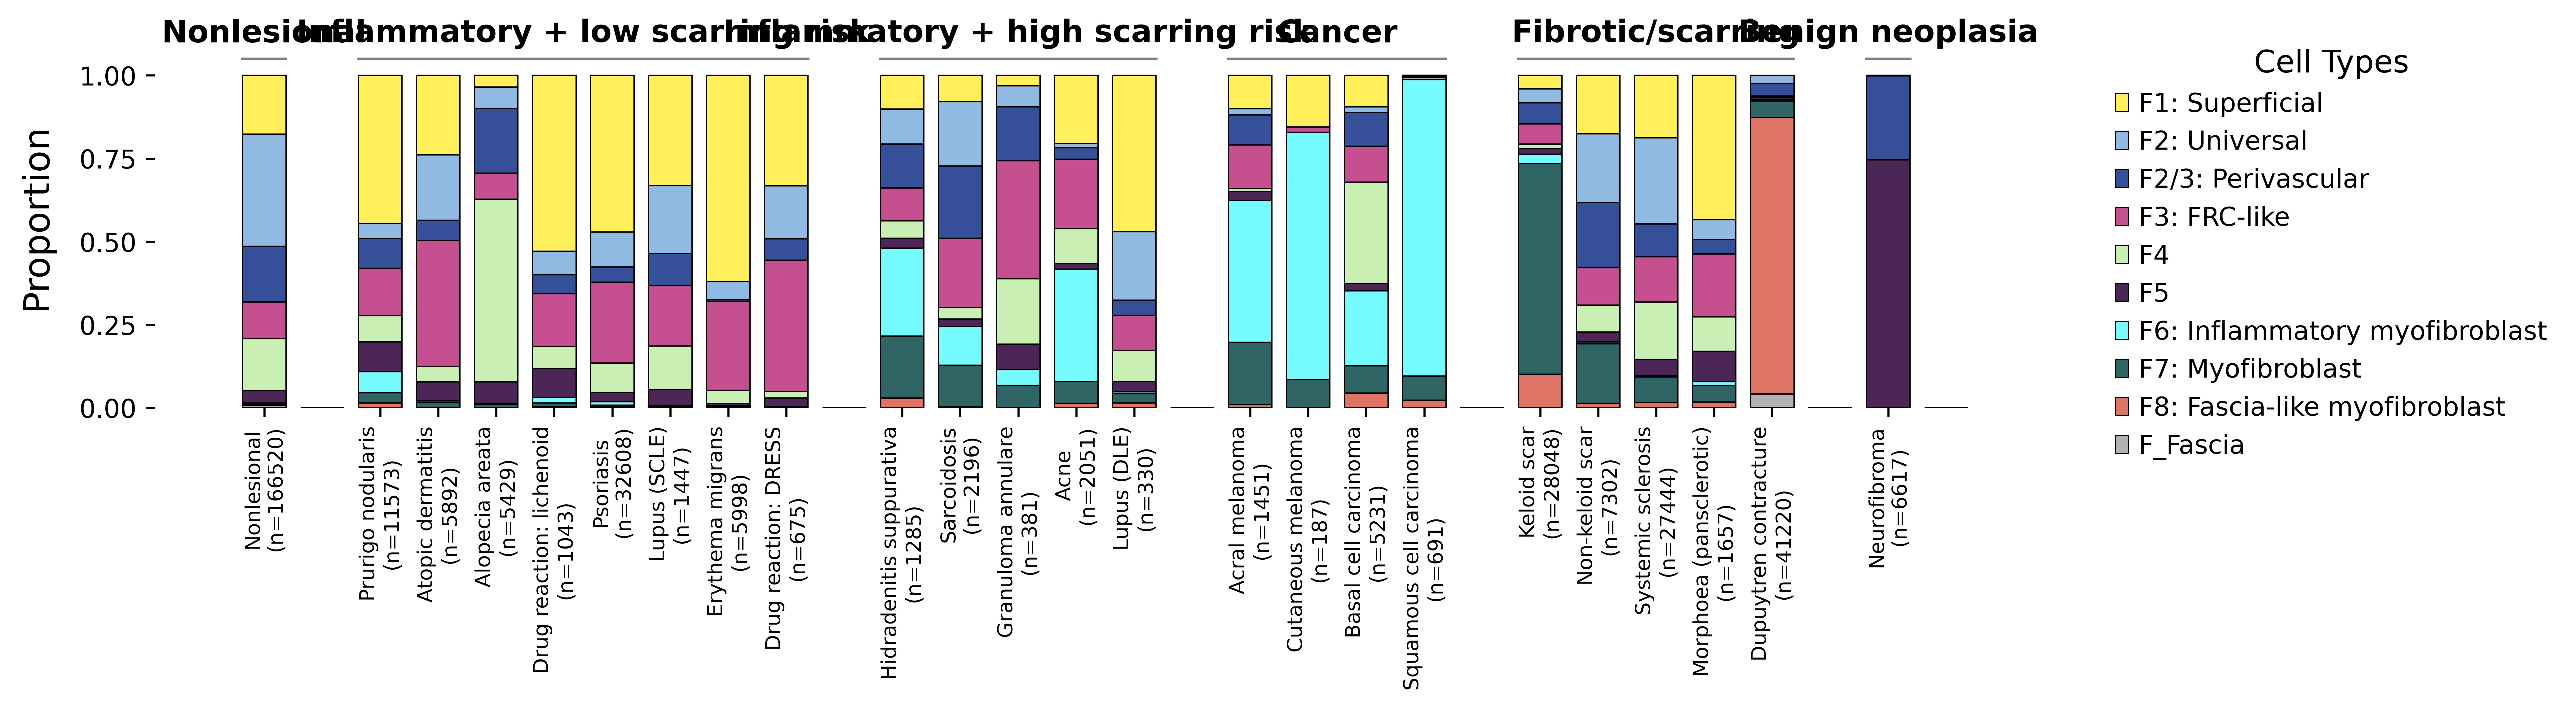

Index(['Nonlesional', 'Nonlesional_spacer', 'Prurigo nodularis',
       'Atopic dermatitis', 'Alopecia areata', 'Drug reaction: lichenoid',
       'Psoriasis', 'Lupus (SCLE)', 'Erythema migrans', 'Drug reaction: DRESS',
       'Inflammatory + low scarring risk_spacer', 'Hidradenitis suppurativa',
       'Sarcoidosis', 'Granuloma annulare', 'Acne', 'Lupus (DLE)',
       'Inflammatory + high scarring risk_spacer', 'Acral melanoma',
       'Cutaneous melanoma', 'Basal cell carcinoma', 'Squamous cell carcinoma',
       'Cancer_spacer', 'Keloid scar', 'Non-keloid scar', 'Systemic sclerosis',
       'Morphoea (pansclerotic)', 'Dupuytren contracture',
       'Fibrotic/scarring_spacer', 'Neurofibroma', 'Benign neoplasia_spacer'],
      dtype='object')


In [23]:
category_counts = adata.obs['Patient_status3'].value_counts()
grouped = adata.obs.groupby(['Patient_status3', 'test13_simple'], observed=True).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

sorted_proportions = pd.DataFrame()
category_positions = {}  
for category, labels in categories.items():
    subset = proportions.loc[labels]
    subset = subset.sort_values(by='F7: Myofibroblast', ascending=False)
    
    start_pos = len(sorted_proportions)
    sorted_proportions = pd.concat([sorted_proportions, subset])
    end_pos = len(sorted_proportions) - 1
    
    category_positions[category] = (start_pos, end_pos)
    
    spacer_row = pd.DataFrame(np.nan, index=[f"{category}_spacer"], columns=subset.columns)
    sorted_proportions = pd.concat([sorted_proportions, spacer_row])


color_list = [custom_colors.get(col, '#d3d3d3') for col in sorted_proportions.columns]


fig, ax = plt.subplots(figsize=(14, 4), dpi=300) 

bar_width = 0.75  
indices = np.arange(len(sorted_proportions))


bottom = np.zeros(len(sorted_proportions))
for i, col in enumerate(reversed(sorted_proportions.columns)):
    color = color_list[-(i + 1)]  
    heights = np.nan_to_num(sorted_proportions[col])
    

    ax.bar(
        indices,
        heights,
        bar_width,
        bottom=bottom,
        color=color,
        label=col,
        edgecolor="black" if np.any(heights > 0) else None,  
        linewidth=0.5 
    )
    bottom += heights


xtick_labels = [
    f"{label}\n(n={category_counts.get(label, 0)})" if label in category_counts else ""
    for label in sorted_proportions.index
]


valid_ticks = [i for i, label in enumerate(xtick_labels) if label != ""]


ax.set_xticks(valid_ticks)
ax.set_xticklabels([xtick_labels[i] for i in valid_ticks], rotation=90, fontsize=8)


ax.set_xlabel('')
ax.set_ylabel('Proportion', fontsize=14, labelpad=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1.15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)


for category, (start, end) in category_positions.items():
    mid_pos = (start + end) / 2
    ax.hlines(y=1.05, xmin=start - 0.4, xmax=end + 0.4, color='grey', linewidth=1)
    ax.text(mid_pos, 1.08, category, ha='center', va='bottom', fontsize=12, fontweight='bold')


handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.02, 1), loc='upper left', 
                   frameon=False, fontsize=10, title="Cell Types", title_fontsize=12)
plt.setp(legend.get_texts(), fontsize='10')

plt.tight_layout()
plt.savefig('fig4/4a.pdf', dpi=300,bbox_inches='tight')
plt.show()
print(sorted_proportions.index)


# fig 4b

In [12]:
adata = adata[adata.obs["Site_status_binary"]=="Lesional"]

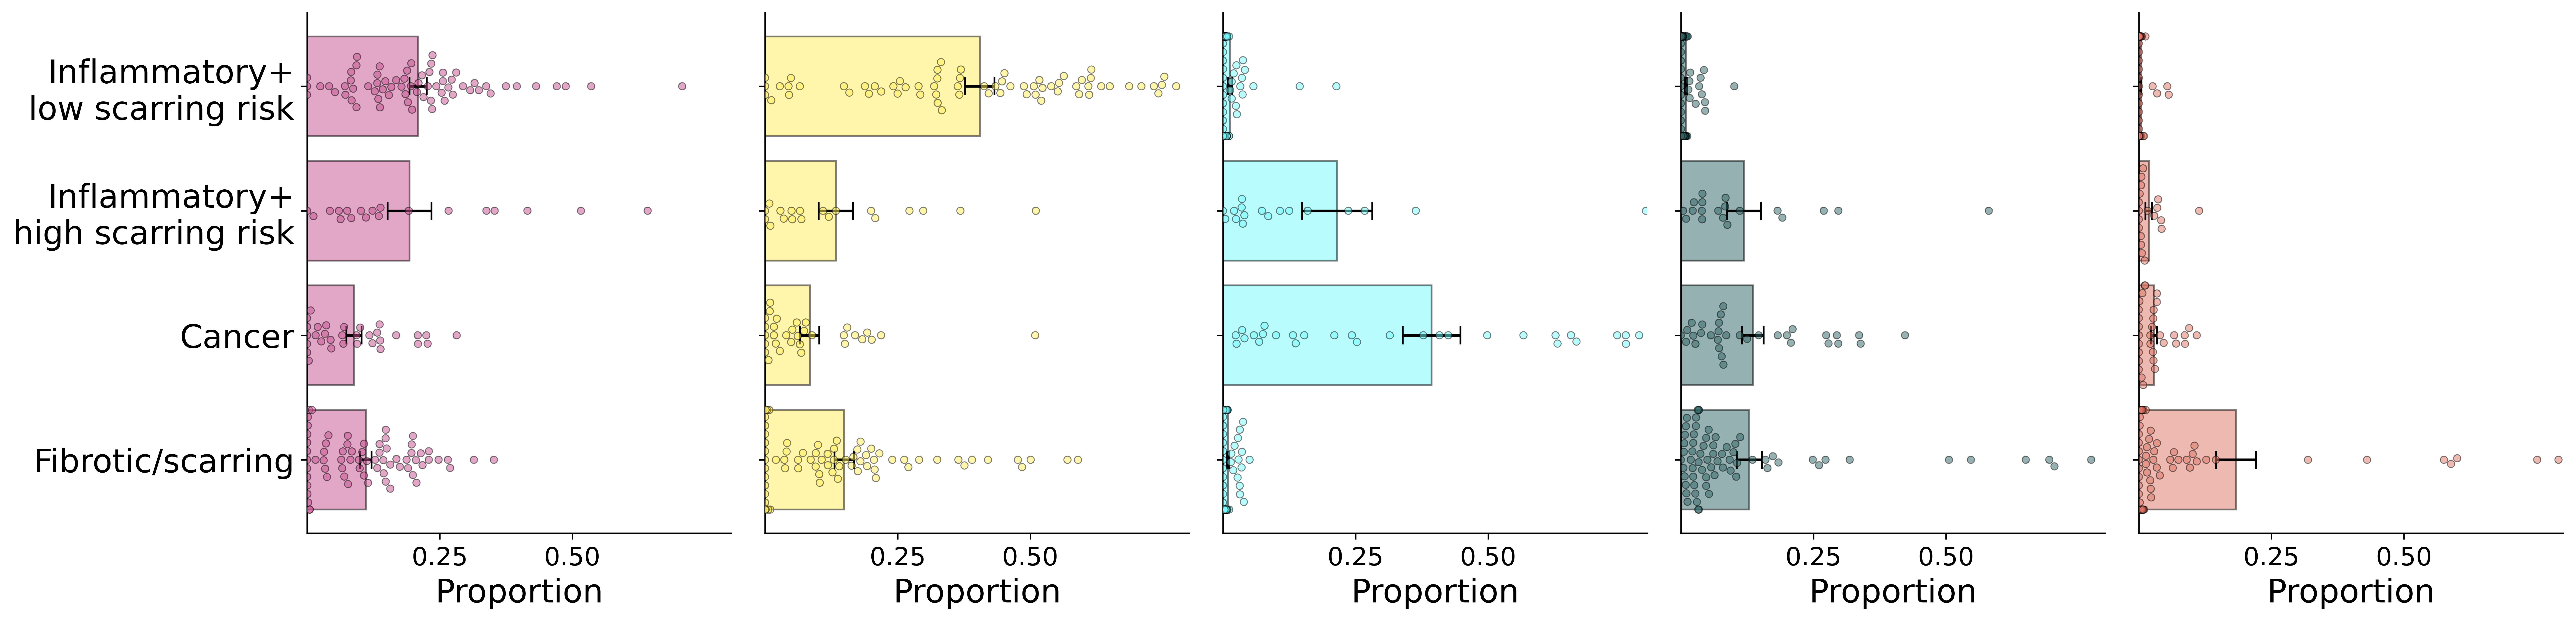

In [13]:
F1_NAME = "F1: Su"
F6_NAME = "F6: Inflammatory my"
fig, axes = plt.subplots(1, 5, figsize=(20, 5), dpi=300)


adata.obs['is_F1'] = adata.obs['test13'].str.startswith(F1_NAME)
adata.obs['is_F7'] = adata.obs['test13'] == "F7: Myofibroblast"
adata.obs['is_F6_chemokine'] = adata.obs['test13'].str.startswith(F6_NAME)
adata.obs['is_F3'] = adata.obs['test13'].str.startswith("F3")
adata.obs['is_F8'] = adata.obs['test13'].str.startswith("F8")




def create_horizontal_swarm_bar_plot_with_stars(ax, is_F, color, custom_order):
    donor_proportion_data = adata.obs.groupby(['DonorID', 'disease_category'], observed=True)[is_F].mean().reset_index()
    
    proportion_data_mean = donor_proportion_data.groupby('disease_category', observed=True)[is_F].mean().reindex(custom_order)
    proportion_data_std = donor_proportion_data.groupby('disease_category', observed=True)[is_F].std().reindex(custom_order)
    proportion_data_n = donor_proportion_data.groupby('disease_category', observed=True)['DonorID'].count().reindex(custom_order)
    proportion_data_sem = proportion_data_std / np.sqrt(proportion_data_n)

    sns.swarmplot(y='disease_category', x=is_F, data=donor_proportion_data, order=custom_order, 
                  ax=ax, size=4, palette=[color], edgecolor='black', linewidth=0.5, alpha=0.5)

    ax.barh(y=proportion_data_mean.index, width=proportion_data_mean.values, 
            xerr=proportion_data_sem.values, color=color, alpha=0.5, capsize=5, linewidth=1,
            edgecolor="black")

    ax.set_xlim(0, 0.8)
    ax.set_xticks([0.25, 0.5])
    ax.set_xlabel('Proportion', fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel('')

categories = ['is_F3', 'is_F1', 'is_F6_chemokine', 'is_F7', 'is_F8']
colors = ['#c6508f',
           '#ffef5a',
          
         "#75fbfd",
          "#2f6565",
         '#dd7465',
         ]





for i, (category, color) in enumerate(zip(categories, colors)):
    create_horizontal_swarm_bar_plot_with_stars(axes[i], category, color, custom_order)
    
    if i > 0:
        axes[i].set_yticklabels([])

plt.tight_layout()
plt.savefig("fig4/4b_by_disease_cat.pdf", dpi=300,bbox_inches='tight')
plt.show()

# fig 4g

In [14]:
LESIONAL_GENES_VSHORT5 = {'F3': ['CCL19', 'CD74', 'CH25H'],
#  'F1': ['COL18A1',
#   'COL23A1',
#   'COL13A1',
#   'COMP',
#   'NKD2',
#   'CRABP1',
#   'TNFRSF21',
#   'CXCL1'],
 'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
 'F6: Myofibroblast inflammatory': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11'],
                         }

xtick_order_orig=["Dupuytren contracture",
 'Keloid scar',
 'Morphoea (pansclerotic)',
 'Systemic sclerosis',
 'Non-keloid scar',
 'Basal cell carcinoma',
 'Squamous cell carcinoma',
 'Acral melanoma',
 'Cutaneous melanoma',
 'Sarcoidosis',
 'Granuloma annulare',
 'Hidradenitis suppurativa',
 'Lupus (DLE)',
 'Acne',
 'Psoriasis',
 'Eczema',
 'Prurigo nodularis',
 'Drug reaction: lichenoid',
 'Drug reaction: DRESS',
 'Lupus (SCLE)',
 'Alopecia areata',
  'Erythema migrans',
 'Neurofibroma']
#xtick_order_orig

 
    
  
  

In [15]:
# flat_genes = [gene for gene_list in LESIONAL_GENES_VSHORT5.values() for gene in gene_list]

# CAF_AND_F6 = {"iCAF": CAF_GENES["iCAF"],
#              "Other F6 Markers": [x for x in flat_genes if x not in CAF_GENES["iCAF"]]
#              }


# for x in [ 'F6: Inflammatory myofibroblast']: 
#     adata_i = adata[adata.obs["test13"] == x]
#     adata_i.obs['disease_category'] = adata_i.obs['disease_category'].str.strip()
#     adata_i.obs['disease_category'] = adata_i.obs['disease_category'].str.replace(r'\n', ' ', regex=True)
#     #adata_i=adata_i[adata_i.obs.disease_category=="Cancer"]
#     print(adata_i.shape)
#     print(adata_i.obs['disease_category'].value_counts())
#     counts = pd.Series(adata_i.obs['disease_category']).value_counts()
#     #counts.index = counts.index.str.replace(r'\n', ' ', regex=True)

#     #filtered_counts = counts[counts > 100]
#     #filtered_categories = filtered_counts.index.tolist()

#     #xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]
#     #xtick_order_with_counts = [   f"{category} (n={filtered_counts[category]})" for category in xtick_order_filtered ]
#     #adata_i_filtered = adata_i[adata_i.obs['disease_category'].isin(filtered_categories)]
#     #adata_i.obs['disease_category_with_counts'] = adata_i.obs['disease_category'].map(  lambda x: f"{x} (n={filtered_counts[x]})")

#     sc.pl.dotplot(
#         adata_i,
#            CAF_AND_F6,
#         groupby="disease_category",
#         standard_scale="var",colorbar_title='Mean expression\n(minmax norm)',
#         cmap="Reds",
#          categories_order=['Inflammatory+ low scarring risk', 'Inflammatory+ high scarring risk',
#                           'Cancer',
#  'Fibrotic/scarring' ],
#         #categories_order=xtick_order_with_counts,
#                 save="s6e_f6_heterogeneity.pdf"

#     )

In [16]:
adata_lesional=adata

In [17]:
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(file_path, 'rb') as file:
    GENES = pickle.load(file)

In [18]:
GENES['F3'] =  ['CCL19',"CD74" ,  'CH25H',  "TNFSF13B",  'IL33', "IRF8" ,#"COX4I2", 
       # "IL7",
        "IL15",
        "VCAM1", "HLA-DRA", "HLA-DRB1",# "CCL11","CCL7", "CCL2",
        'ADAMDEC1', 'CXCL9'
        #"ICAM1", 
        #'CX3CL1', 'ACHE', 'CCL8', 
 
           ]
GENES['F1']  = [   "APCDD1",   "COL18A1",  "COL23A1",   "COL13A1",  "COMP",  
                                          "NKD2","RSPO1",  "AXIN2" , "WIF1",'SFRP2',
                                          #"HSPB3", 
                                   'CRABP1',
  'TNFRSF21',
  'CXCL1']
    

In [19]:
GENES['F6'] = ['CXCL8',
 'CXCL5',
 'CXCL6',
 'CXCL13',
 'IL11',
 'IL24',
 'MMP1',
 'MMP3',
 'IL7R',
# 'INHBA',
 'CSF3',
 'TDO2',
 'WWC1',
 'CHI3L1',
 'CCL5',
 'CCL11',
 'FAM167A',
 #'HIF1A'
              ]

In [20]:
ORDER = ['Prurigo nodularis',
       'Atopic dermatitis', 'Alopecia areata', 'Drug reaction: lichenoid',
       'Psoriasis', 'Lupus (SCLE)', 'Erythema migrans', 'Drug reaction: DRESS',
        'Hidradenitis suppurativa',
       'Sarcoidosis', 'Granuloma annulare', 'Acne', 'Lupus (DLE)',
       'Acral melanoma',
       'Cutaneous melanoma', 'Basal cell carcinoma', 'Squamous cell carcinoma',
     #  'Cancer_spacer', 
         'Keloid scar', 'Non-keloid scar', 'Systemic sclerosis',
       'Morphoea (pansclerotic)', 'Dupuytren contracture',
       'Neurofibroma', ]

# Fig 4g

/tmp/ipykernel_25539/1133683076.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/tmp/ipykernel_25539/1133683076.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


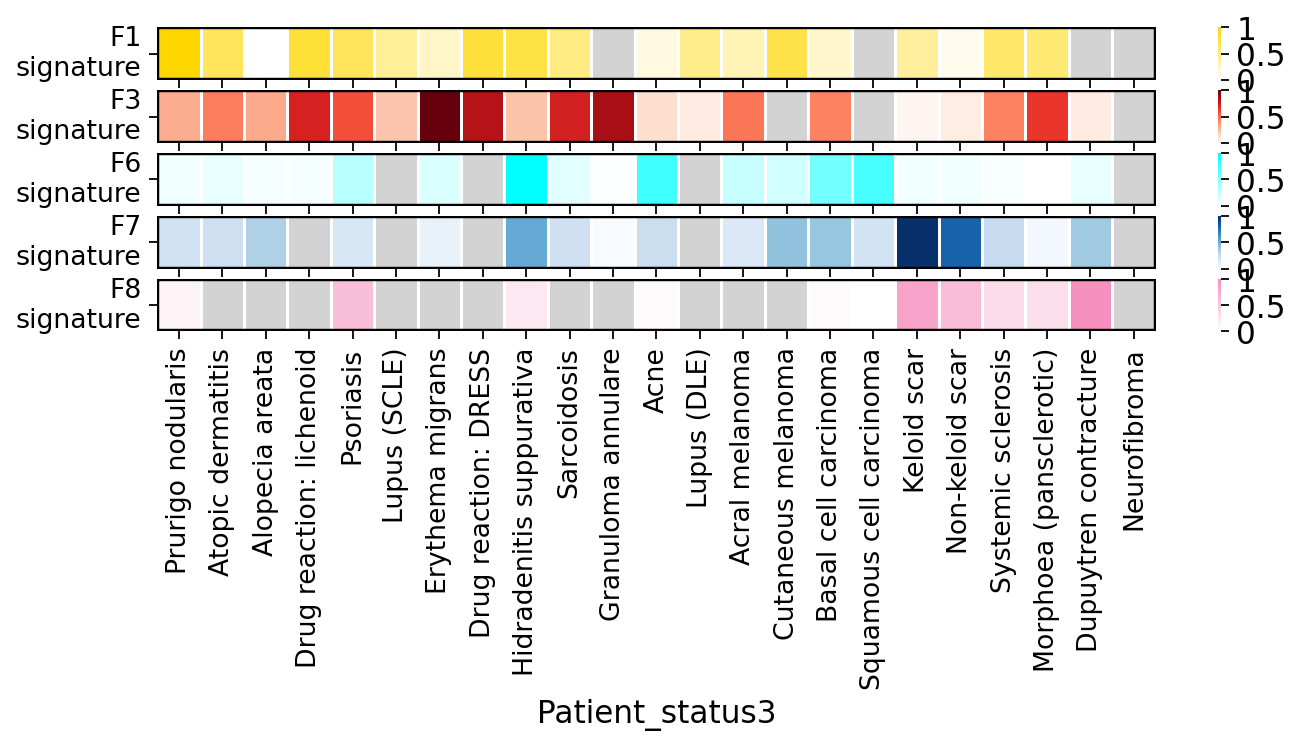

In [21]:
COLORMAPS = {   
    "F1": mcolors.LinearSegmentedColormap.from_list(
        "bright_yellow", ["#FFFFFF", "#FFD700"], N=256 ), # White → Neon Yellow → Gold
        
         "F3": "Reds",
            "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),  # Neon Blue
    "F7": "Blues",
    "F8": mcolors.LinearSegmentedColormap.from_list("neon_pink", ["#FFFFFF", "#F58FBE"], N=256)

}
 

CONTROL_SIZE = 1000
N_BINS = 25
FIGSIZE = (10, 0.5)

GENE_SETS = [ "F1", "F3",  "F6", "F7", "F8"]

fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(10, len(GENE_SETS) * 0.5), sharex=True)

def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
    """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

    for condition in ORDER:
        if condition not in cluster_scores.index:
            cluster_scores.loc[condition] = np.nan  

    cluster_scores = cluster_scores.loc[ORDER]

    # Normalization
    if normalisation == "minmax":
        cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

    # Mask for missing values (NaNs will be greyed out)
    mask = cluster_scores.isna()

    # Convert cmap to LinearSegmentedColormap if it's a string
    if isinstance(cmap, str):
        cmap = plt.cm.get_cmap(cmap)

    # Define a custom colormap that includes grey for missing values
    cmap_with_grey = cmap
    cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

    # Plot heatmap with mask
    sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
                cbar_kws={"label": ""}, vmin=0, ax=ax, 
                square=False, xticklabels=False, yticklabels=False, mask=mask.T)  # Apply transposed mask
    
    ax.grid(False)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels([0, 0.5, 1])

    # Add a black border
    ax.add_patch(patches.Rectangle(
        (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
        linewidth=2, edgecolor='black', facecolor='none'))

    # X-Ticks (only show for last plot)
    if show_xticks:
        ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
        ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
    else:
        ax.set_xticks([])  # Remove xticks for all but last subplot

    # Y-Ticks (only for clarity)
    ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
    ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')

    ax.set_title("", fontsize=0)

# Loop through each gene set
for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    adata_ii = adata_lesional[adata_lesional.obs["test13"].str.startswith(gene_set)]
    
        # Get the value counts of the "test13" column
    value_counts = adata_ii.obs["Patient_status3"].value_counts()

    # Get the values that occur more than 100 times
    valid_values = value_counts[value_counts > 15].index
    # Filter adata_ii to keep only those rows where "test13" is in the valid_values
    adata_ii = adata_ii[adata_ii.obs["Patient_status3"].isin(valid_values)].copy()
    #print(adata_ii.obs.test13.value_counts())
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}\nsignature")
    
    # Compute mean scores per patient status
    cluster_scores = adata_ii.obs.groupby('Patient_status3')[[f"{gene_set}\nsignature"]].mean()
    
    # Plot matrix in the current axis
    plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))

# Add common x-axis label
fig.supxlabel("", fontsize=14)

plt.tight_layout()
#plt.savefig("fig5/aligned_gene_modules_WITHF8.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [22]:


# Calculate the total number of fibroblasts per disease (based on "test13" column)
# This step counts all fibroblasts (subtypes) for each disease
total_fibroblasts_per_disease = adata_lesional.obs.groupby("Patient_status3")["test13"].count()

# Calculate the number of fibroblasts of each subtype per disease
fibroblast_subtype_counts = adata.obs.groupby(["Patient_status3", "test13"]).size().unstack(fill_value=0)

# Calculate the proportion of each fibroblast subtype for each disease
fibroblast_subtype_proportions = fibroblast_subtype_counts.div(total_fibroblasts_per_disease, axis=0)

# Print or view the result
print(fibroblast_subtype_proportions)

test13                    F1: Superficial  F2: Universal  F2/3: Perivascular  \
Patient_status3                                                                
Acne                             0.204291       0.013652            0.034617   
Acral melanoma                   0.100620       0.018608            0.090283   
Alopecia areata                  0.035181       0.063732            0.194695   
Atopic dermatitis                0.239138       0.196877            0.060251   
Basal cell carcinoma             0.094437       0.017205            0.100937   
Cutaneous melanoma               0.155080       0.000000            0.000000   
Drug reaction: DRESS             0.331852       0.160000            0.063704   
Drug reaction: lichenoid         0.529243       0.069990            0.057526   
Dupuytren contracture            0.000315       0.023629            0.038549   
Erythema migrans                 0.620207       0.055185            0.004668   
Granuloma annulare               0.03149

#### F1
Acne  :  0.20429058995611896
Acral melanoma  :  0.10062026188835287
Alopecia areata  :  0.035181433044759625
Atopic dermatitis  :  0.2391378139850645
Basal cell carcinoma  :  0.09443701013190595
Cutaneous melanoma  :  0.15508021390374332
Drug reaction: DRESS  :  0.33185185185185184
Drug reaction: lichenoid  :  0.5292425695110259
Dupuytren contracture  :  0.00031538088306647257
Erythema migrans  :  0.6202067355785261
Granuloma annulare  :  0.031496062992125984
Hidradenitis suppurativa  :  0.10116731517509728
Keloid scar  :  0.04028807758128922
Lupus (DLE)  :  0.4696969696969697
Lupus (SCLE)  :  0.3310297166551486
Morphoea (pansclerotic)  :  0.4339167169583585
Non-keloid scar  :  0.17611613256642017
Prurigo nodularis  :  0.44465566404562346
Psoriasis  :  0.471142051030422
Sarcoidosis  :  0.07923497267759563
Systemic sclerosis  :  0.1879463635038624
#### F3
Acne  :  0.20867869332033154
Acral melanoma  :  0.13094417643004824
Alopecia areata  :  0.07865168539325842
Atopic dermatitis

/tmp/ipykernel_25539/3169407561.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


Acne  :  0.3378839590443686
Acral melanoma  :  0.4272915230875258
Alopecia areata  :  0.002947135752440597
Atopic dermatitis  :  0.0050916496945010185
Basal cell carcinoma  :  0.2250047792009176
Cutaneous melanoma  :  0.7433155080213903
Drug reaction: lichenoid  :  0.01725790987535954
Dupuytren contracture  :  0.004706453178068898
Erythema migrans  :  0.0028342780926975657
Granuloma annulare  :  0.047244094488188976
Hidradenitis suppurativa  :  0.26381322957198444
Keloid scar  :  0.02816600114090131
Lupus (DLE)  :  0.006060606060606061
Lupus (SCLE)  :  0.0027643400138217
Morphoea (pansclerotic)  :  0.012070006035003017
Non-keloid scar  :  0.005477951246233908
Prurigo nodularis  :  0.06299144560615225
Psoriasis  :  0.009813542688910697
Sarcoidosis  :  0.11657559198542805
Squamous cell carcinoma  :  0.8914616497829233
Systemic sclerosis  :  0.00429966477189914
#### F7
Acne  :  0.06484641638225255
Acral melanoma  :  0.1874569262577533
Alopecia areata  :  0.009762387179959477
Atopic dermat

/tmp/ipykernel_25539/3169407561.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


Acne  :  0.014139444173573866
Acral melanoma  :  0.007580978635423846
Alopecia areata  :  0.0009209799226376865
Atopic dermatitis  :  0.00186693822131704
Basal cell carcinoma  :  0.04415981647868476
Drug reaction: lichenoid  :  0.004793863854266539
Dupuytren contracture  :  0.8321688500727802
Erythema migrans  :  0.0006668889629876625
Hidradenitis suppurativa  :  0.029571984435797664
Keloid scar  :  0.10039931545921278
Lupus (DLE)  :  0.015151515151515152
Morphoea (pansclerotic)  :  0.017501508750754374
Non-keloid scar  :  0.012736236647493838
Prurigo nodularis  :  0.014257323079581784
Psoriasis  :  0.002238714425907753
Sarcoidosis  :  0.00273224043715847
Squamous cell carcinoma  :  0.023154848046309694
Systemic sclerosis  :  0.016324150998396736


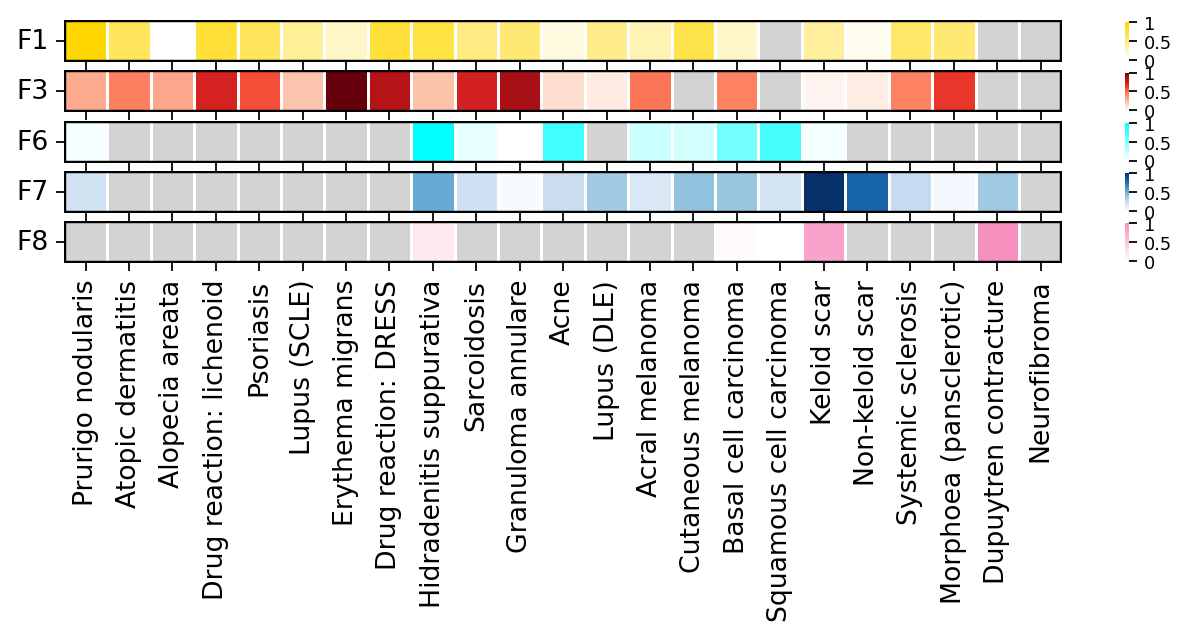

In [23]:


COLORMAPS = {   
    "F1": mcolors.LinearSegmentedColormap.from_list("bright_yellow", ["#FFFFFF", "#FFD700"], N=256),
    "F3": "Reds",
    "F6": mcolors.LinearSegmentedColormap.from_list("neon_blue", ["#FFFFFF", "#00FFFF"], N=256),
    "F7": "Blues",
    "F8": mcolors.LinearSegmentedColormap.from_list("neon_pink", ["#FFFFFF", "#F58FBE"], N=256)
}
GENE_SETS = ["F1", "F3", "F6", "F7", "F8"  ]

fig, axes = plt.subplots(nrows=len(GENE_SETS), figsize=(10, len(GENE_SETS) * 0.4), sharex=True)

CONTROL_SIZE = 1000
N_BINS = 25




def plot_matrix(cluster_scores, cmap, normalisation, ax, show_xticks=False):
    """Plots a single heatmap onto an existing axis `ax`, with explicit marking of missing conditions."""

    # Ensure all ORDER categories exist
    for condition in ORDER:
        if condition not in cluster_scores.index:
            cluster_scores.loc[condition] = np.nan  # Insert NaN row

    # Reorder rows
    cluster_scores = cluster_scores.loc[ORDER]

    # Normalization
    if normalisation == "minmax":
        cluster_scores = (cluster_scores - cluster_scores.min()) / (cluster_scores.max() - cluster_scores.min())

    # Mask for missing values (NaNs will be greyed out)
    mask = cluster_scores.isna()

    # Convert cmap to LinearSegmentedColormap if it's a string
    if isinstance(cmap, str):
        cmap = plt.cm.get_cmap(cmap)

    # Define a custom colormap that includes grey for missing values
    cmap_with_grey = cmap
    cmap_with_grey.set_bad(color='#D3D3D3')  # Light gray for NaNs

    # Plot heatmap with mask (Transposed for vertical bars)
    sns.heatmap(cluster_scores.T, cmap=cmap_with_grey, linewidths=0.5, linecolor='white', 
                cbar_kws={"label": "", "shrink": 0.9, "aspect": 10}, vmin=0, ax=ax, 
                square=False, xticklabels=False, yticklabels=False, mask=mask.T)
    ax.grid(False)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 0.5, 1])
    cbar.set_ticklabels([0, 0.5, 1])
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)  # Adjust the font size (e.g., 8)

    # Add a black border
    ax.add_patch(patches.Rectangle(
        (0, 0), len(cluster_scores.index), len(cluster_scores.columns),
        linewidth=2, edgecolor='black', facecolor='none'))

    # X-Ticks (only show for last plot)
    if show_xticks:
        ax.set_xticks([i + 0.5 for i in range(len(cluster_scores.index))])
        ax.set_xticklabels(cluster_scores.index, rotation=90, fontsize=12, ha='center')
    else:
        ax.set_xticks([])  # Remove xticks for all but last subplot

    # Y-Ticks (only for clarity)
    ax.set_yticks([i + 0.5 for i in range(len(cluster_scores.columns))])
    ax.set_yticklabels(cluster_scores.columns, fontsize=12, va='center')
    ax.set_xlabel("")
    ax.set_title("", fontsize=0)


for i, (gene_set, cmap) in enumerate(COLORMAPS.items()):
    print("####", gene_set)
    adata_ii = adata_lesional[adata_lesional.obs["test13"].str.startswith(gene_set)]
    
    value_counts = adata_ii.obs["Patient_status3"].value_counts()

    valid_values = value_counts[value_counts > 1].index
    adata_ii = adata_ii[adata_ii.obs["Patient_status3"].isin(valid_values)].copy()
    adata_ii = sc.tl.score_genes(adata_ii, GENES[gene_set], ctrl_size=CONTROL_SIZE, n_bins=N_BINS, copy=True, score_name=f"{gene_set}")
    
    cluster_scores = adata_ii.obs.groupby('Patient_status3')[[f"{gene_set}"]].mean()
    
    filtered_diseases = []
    for disease in cluster_scores.index:
        fibroblast_proportion = None
        for prefix in fibroblast_subtype_proportions.columns:
            if prefix.startswith(gene_set):  
                print(disease, " : ",  fibroblast_subtype_proportions.loc[disease, prefix])
                fibroblast_proportion = fibroblast_subtype_proportions.loc[disease, prefix]
                break  
                
        if fibroblast_proportion is not None and fibroblast_proportion < 0.02:
            filtered_diseases.append(disease)
    cluster_scores = cluster_scores.loc[~cluster_scores.index.isin(filtered_diseases)]

    plot_matrix(cluster_scores, cmap, "minmax", axes[i], show_xticks=(i == len(GENE_SETS) - 1))


fig.supxlabel("", fontsize=14)

plt.tight_layout()
fig.savefig("fig4/fig4g.pdf", dpi=300, bbox_inches='tight', pad_inches=0.3)

plt.show()

# fig 4f

in fig2_4_7_Xenium.ipynb